In [1]:
import sys, os
sys.path.insert(0, '../../../residual2vec_')

In [2]:
os.environ['DISABLE_WANDB'] = 'true'

#disable epoch level tqdm
os.environ['DISABLE_TQDM'] = 'true'

In [3]:
# standard imports
import numpy as np
import pandas as pd
import pickle as pkl
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# codebase
from utils import snakemake_utils, score


/data/sg/ashutiwa/miniconda3/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:

DIR = '../../../final_crosswalk_temp'
def get_embs(dataset, directory, root=DIR):
    model_to_embs = {
        "fairwalk+deepwalk": "{}/{}_fairwalk_deepwalk.npy",
        "fairwalk+node2vec": "{}/{}_fairwalk_node2vec.npy",
        "crosswalk+deepwalk": "{}/{}_crosswalk_deepwalk.npy",
        "crosswalk+node2vec": "{}/{}_crosswalk_node2vec.npy",
        "GCN+deepwalk+random": "{}/{}_gcn_None_deepwalk_deepwalk_embs.npy",
        "GCN+deepwalk+r2v": "{}/{}_gcn_None_deepwalk_r2v_embs.npy",
        "GCN+node2vec+random": "{}/{}_gcn_None_node2vec_deepwalk_embs.npy",
        "GCN+node2vec+r2v": "{}/{}_gcn_None_node2vec_r2v_embs.npy",
        "GAT+deepwalk+random": "{}/{}_gat_None_deepwalk_deepwalk_embs.npy",
        "GAT+deepwalk+r2v": "{}/{}_gat_None_deepwalk_r2v_embs.npy",
        "GAT+node2vec+random": "{}/{}_gat_None_node2vec_deepwalk_embs.npy",
        "GAT+node2vec+r2v": "{}/{}_gat_None_node2vec_r2v_embs.npy",
        "deepwalk": "{}/{}_deepwalk_128_embs.npy",
        "node2vec": "{}/{}_node2vec_128_embs.npy",
        "residual2vec": "{}/{}_residual2vec_128_embs.npy"
    }
    folder = root + '/' + dataset + '/' + dataset + '_' + directory
    ret = {}
    for i in model_to_embs:
        ret[i] = np.load(model_to_embs[i].format(folder, dataset))
        
        
    return ret



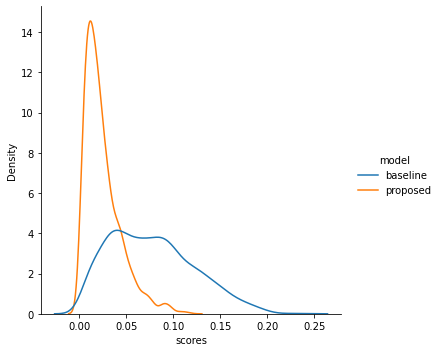

In [6]:
embs = get_embs('airport', 'one')
# embs_128 = get_embs('airport', 'one', '../../../final_crosswalk_temp/')
y = snakemake_utils.get_dataset("airport").get_grouped_col()

df = pd.DataFrame({
    'scores': np.concatenate(
        (
            score.get_node_parity(embs["GAT+deepwalk+random"], y, 'var'),
            score.get_node_parity(embs["GAT+deepwalk+r2v"], y, 'var'),
#             score.get_node_parity(embs_128["GAT+deepwalk+random"], y, 'var'),
#             score.get_node_parity(embs_128["GAT+deepwalk+r2v"], y, 'var'),
            
        )
    ),
    'model': np.array(['baseline'] * y.shape[0] + ['proposed'] * y.shape[0]) 
    
})
sns.displot(data=df, x="scores", kind='kde', hue='model')